In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [111]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [112]:
X

array([[-5.01099107,  1.65602618],
       [-6.98702485,  0.33079864],
       [-6.93129035, -0.20473764],
       ...,
       [ 9.25431206,  2.42135972],
       [10.44859843,  1.82309234],
       [-3.90823486,  6.14187058]])

In [113]:
y

array([1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2,
       1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1,
       1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2,
       0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2,

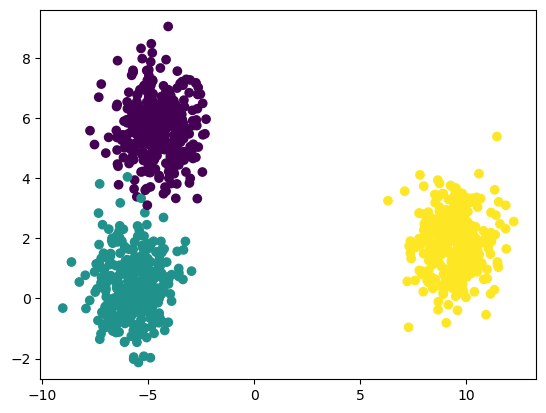

In [114]:
plt.scatter(X[:,0], X[:,1], c=y)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [133]:
# perform standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.cluster import KMeans

In [135]:
# Elbow method to select K value
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k, init="k-means++")
    model.fit(X_train_scaled)
    wcss.append(model.inertia_)
    

In [136]:
wcss

[1339.9999999999989,
 647.6097584557614,
 122.92145283140901,
 98.73886051706754,
 75.225299068378,
 52.80315246643438,
 45.41651365956675,
 39.290899583300124,
 33.625389502245575,
 29.755047517997255]

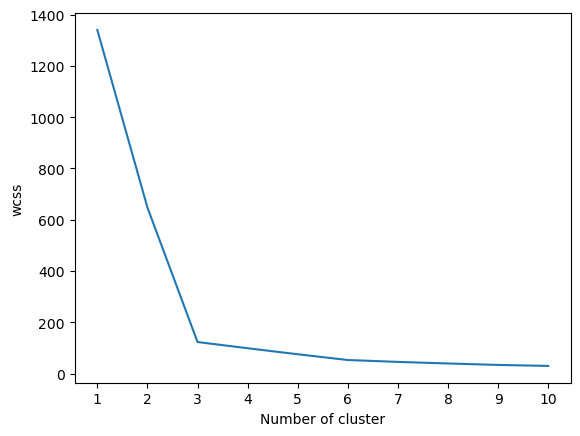

In [137]:
# to determine exact k-value by ploting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11)) #Set the positions of tick marks on the x-axis.
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

In [138]:
# elbow koni is at 3 so we select k=3 means no. of cluster=3

In [139]:
# after knowing k value iomplement kmeans with that k value

In [140]:
model = KMeans(n_clusters=3, init="k-means++")

In [141]:
model.fit_predict(X_train_scaled)

array([2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2,
       1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1,

In [142]:
y_pred = model.predict(y_test_scaled)

In [143]:
y_pred

array([2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0,

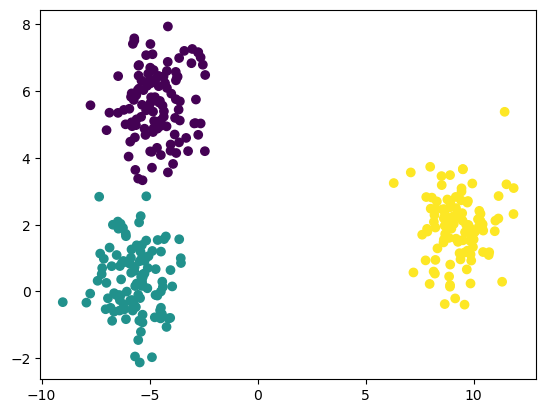

In [145]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

## validating k-values is done by 2 more things :
- kneelocator
- silhoutee scoring 

In [146]:
## Kneelocator
!pip install kneed

In [149]:
from kneed import KneeLocator

In [153]:
kl = KneeLocator(range(1,11), wcss, curve= "convex", direction="decreasing")

In [155]:
# it is validating k-value
kl.elbow

3

In [156]:
#silhoutee scoring
from sklearn.metrics import silhouette_score

In [163]:
silhouette_coefficient = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmean.labels_)
    silhouette_coefficient.append(score)

In [164]:
silhouette_coefficient

[0.5655645237972095,
 0.7579375221481767,
 0.6416413084938396,
 0.5424072456711099,
 0.46518758621933776,
 0.45278908797322226,
 0.4315751062126853,
 0.4117444081551729,
 0.40607610526862215]

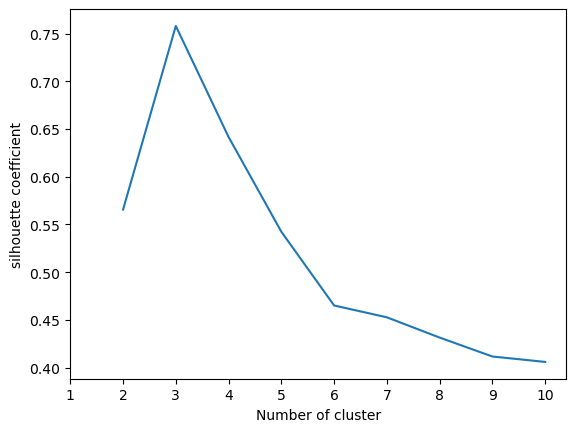

In [167]:
# to determine exact k-value by ploting elbow curve
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(1,11)) #Set the positions of tick marks on the x-axis.
plt.xlabel("Number of cluster")
plt.ylabel("silhouette coefficient")
plt.show()

In [168]:
# it is validating k=3

In [169]:
# wherever silhouette coefficient is high....at that point whatever k-value is consider as a validating of k-value 